In [24]:
import pickle
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#imports
sns.set_context('poster')

In [3]:
with open('nmf_model_noI', 'rb') as read_file:
    nmf_model = pickle.load(read_file)

In [4]:
with open('word_likelihood_by_topic_df_noI', 'rb') as read_file:
    topic_df = pickle.load(read_file)

In [5]:
with open('text_topics_df_noI.pickle', 'rb') as read_file:
    text_topics_df = pickle.load(read_file)

In [6]:
with open('cleaned_combined_labeled_data_noI', 'rb') as read_file:
    data_df = pickle.load(read_file)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13570 entries, 0 to 17880
Data columns (total 16 columns):
coordinates    18 non-null object
created_at     13570 non-null object
description    13570 non-null object
geo            18 non-null object
hashtags       13570 non-null object
id             13570 non-null object
index          13570 non-null int64
location       13570 non-null object
name           13570 non-null object
place          655 non-null object
retweeted      8301 non-null float64
screen_name    13570 non-null object
search_term    13570 non-null object
text           13570 non-null object
month          13570 non-null object
year           13570 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 1.8+ MB


In [9]:
# Choose an optimal K (using silhouette score)
scores = []
ks = []
for n in range(2,26,3):
    num_clusters = n
    km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
    km.fit(text_topics_df)
    cluster_labels = km.fit_predict(text_topics_df)
    silhouette_avg = silhouette_score(text_topics_df, cluster_labels)
    ks.append(n)
    scores.append(silhouette_avg)
    print("N: " + str(n) + ", Score: " + str(silhouette_avg))

N: 2, Score: 0.11108455761756786
N: 5, Score: 0.16518561430487191
N: 8, Score: 0.2251071139964235
N: 11, Score: 0.23816526500296323
N: 14, Score: 0.25553525706812213
N: 17, Score: 0.2702354156744441
N: 20, Score: 0.3314911645776422
N: 23, Score: 0.34484201306718254
[0.11108455761756786, 0.16518561430487191, 0.2251071139964235, 0.23816526500296323, 0.25553525706812213, 0.2702354156744441, 0.3314911645776422, 0.34484201306718254]
[2, 5, 8, 11, 14, 17, 20, 23]


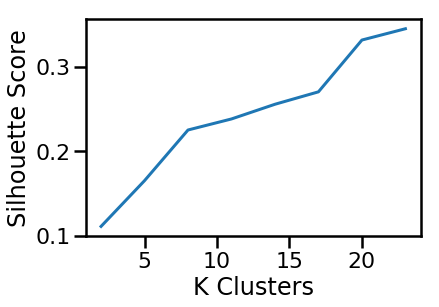

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot elbow curve
plt.plot(ks,scores)
plt.xlabel('K Clusters')
plt.ylabel('Silhouette Score')
plt.show()
plt.savefig('kmeans_silhouette_score.jpg',dpi=300)

**Choose 8 clusters**. 

8 has a relatively high (relatively) score and isn't so large as to be hard to interpret. 

In [11]:
# Try 2 to see if it can magically separate sick vs not sick tweets 

# Pick 2 clusters - run again
num_clusters = 2
km2 = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km2.fit(text_topics_df)
cluster_labels2 = km2.fit_predict(text_topics_df)
silhouette_avg2 = silhouette_score(text_topics_df, cluster_labels2)
print("N: " + str(num_clusters) + ", Score: " + str(silhouette_avg))

N: 2, Score: 0.34484201306718254


In [12]:
# Pick 8 clusters - run again
num_clusters = 8
km8 = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km8.fit(text_topics_df)
cluster_labels8 = km8.fit_predict(text_topics_df)
silhouette_avg8 = silhouette_score(text_topics_df, cluster_labels8)
print("N: " + str(num_clusters) + ", Score: " + str(silhouette_avg))

N: 8, Score: 0.34484201306718254


In [13]:
cluster_df2 = data_df.copy()
cluster_df2['cluster'] = km2.labels_
cluster_df2.drop(columns=['coordinates','created_at','description','geo','hashtags','id','name','place','retweeted'],axis=1, inplace=True)
cluster_df2.head()

,index,location,screen_name,search_term,text,month,year,cluster
0,0,43000,Arifudennn,sore_throat,Sore throat ke sore brain..,Dec,2011,1
1,1,,__Steph95__,sore_throat,Woke up with a sore throat and plugged ears,Oct,2011,1
2,2,"Biloxi, MS",Kelz2223,sore_throat,"My battling allergies: *swollen eyes, sore thr...",Mar,2017,0
3,3,,aileengrazia,sore_throat,ya know sore throat sucks,Oct,2018,0
4,4,essex,_justemma__,sore_throat,"No I'm poorly, shivers, bad head, sore throat...",Aug,2010,0


In [14]:
cluster_df8 = data_df.copy()
cluster_df8['cluster'] = km8.labels_
cluster_df8.drop(columns=['coordinates','created_at','description','geo','hashtags','id','name','place','retweeted'],axis=1, inplace=True)
cluster_df8.head()

,index,location,screen_name,search_term,text,month,year,cluster
0,0,43000,Arifudennn,sore_throat,Sore throat ke sore brain..,Dec,2011,1
1,1,,__Steph95__,sore_throat,Woke up with a sore throat and plugged ears,Oct,2011,1
2,2,"Biloxi, MS",Kelz2223,sore_throat,"My battling allergies: *swollen eyes, sore thr...",Mar,2017,0
3,3,,aileengrazia,sore_throat,ya know sore throat sucks,Oct,2018,0
4,4,essex,_justemma__,sore_throat,"No I'm poorly, shivers, bad head, sore throat...",Aug,2010,0


In [16]:
with open('cluster2_labels_df.pickle', 'wb') as to_write:
    pickle.dump(cluster_df2, to_write)

with open('cluster8_labels_df.pickle', 'wb') as to_write:
    pickle.dump(cluster_df8, to_write)

In [18]:
# 2 clusters - wordclouds
cluster0 = cluster_df2[cluster_df2['cluster']==0]['text']
text_cluster0 = " ".join(tweet for tweet in cluster0)
text_cluster0



'My battling allergies: *swollen eyes, sore throat, tired looking*\n\nEveryone: “oh my god! Kelly why are you crying?!…  ya know sore throat sucks  No I\'m poorly, shivers, bad head, sore throat, both my ears hurt, in fact my whole face hurts. I hu…  Oh no. Sore throat and cough. Most lupies and autoimmune warriors I know can handle tough diagnosis, but hints of a…  i just woke up and can barely talk bc i have the worst sore throat in history 👍🏼  A sore body and a sore throat brings the fever back HAHA my body really ain\'t cooperating Sorry but I\'m far too busy and important to have to deal with a sore throat I’ve googled all the symptoms - I’ve been having the chills , sore throat , cough , fever. I have extrwme paranoia…  Woke up to a sore throat and an inflamed lymph node ah yes.\n\nBecause this is what I need right now. I woke up with a sore throat... :(  Sorry you are feeling poorly, I’ve got a dreadful cold and sore throat and taken myself back to bed…  The concert is tmr but I

In [19]:
cluster1 = cluster_df2[cluster_df2['cluster']==1]['text']
text_cluster1 = " ".join(tweet for tweet in cluster1)
text_cluster1

' Sore throat ke sore brain..  Woke up with a sore throat and plugged ears   Yes i went out with colleagues gor set lunch and order rice with grilled saba,cawan mushi ,gyoza n f…  Woke Up With A Sore Throat 😩 Doctor: Hi how are you doing\nMe: Good, thank you, I have actually just been experiencing a sore throat lately\nDocto…  Just finished 11 hours of lecturing at  through this week covering preaching, the resurrection and as…  Sore Throat Spray  just so yall know, my cough and sore throat got EXTRA bad today that i refuse to speak anymore until i get better i have a sore throat and my voice is raspy, so my brothers keep telling me to say “mike wazowski” over and over again Sinus ,+ ,Sore Throat + Skin  Fever gone in two days but why is this flu and sore throat so bloody stubborn 😩😭😩😭 Can I just submerge myself in water? Would that help getting rid of my sore throat? sore throat, big time 😭 I woke up to a sore throat, aches, and chills 🤒 Sore throat again and again and againnnnn   I n

# Use wordclouds to visualize and check clusters

In [21]:
stopwords = set(STOPWORDS)
wordcloud0 = WordCloud(stopwords=stopwords, background_color="white").generate(text_cluster0)
wordcloud1 = WordCloud(stopwords=stopwords, background_color="white").generate(text_cluster1)

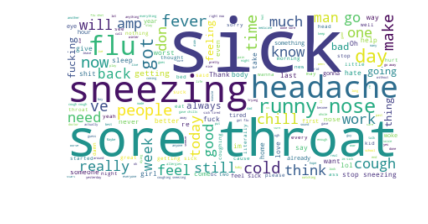

In [22]:
plt.imshow(wordcloud0, interpolation='bilinear')

plt.axis("off")
plt.show()

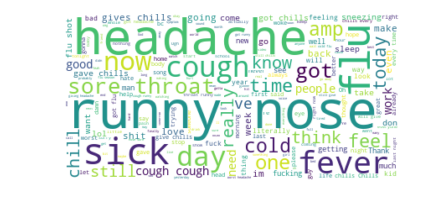

In [23]:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

### 8 Clusters

In [26]:
# 8 clusters - wordclouds

clusters8_dict = defaultdict()
clusters8 = [x for x in range(8)]
for c in clusters8:
    cluster = cluster_df8[cluster_df8['cluster']==c]['text']
    text_cluster = " ".join(tweet for tweet in cluster)
    clusters8_dict[c] = text_cluster
clusters8_dict[7]

'haha i wish,i have a sore throat so i can\'t but i will internally   If you go to Publix get me sore throat spray Lololololol no joke honestly i would take puking over a sore throat anyday.. this shit HURTS Having sore throat which made my voice husky, called someone for the first time and she said I sound like an  Nah tbf love a sore throat and blocked nose. Nothing better Fever, sore throat, colds, puta nice combo men How Dave Grohl doesn\'t have a constant sore throat is beyond me...  I\'m having sore throat and my cat just sneezed on my face. Great. Having a sore throat sucks😭😑 Heavy head.\nSore throat\nSwollen gums.\nThis is going to be a lovely weekend ❤️🤞🏾 Fell sleep 4.30 am woke up at 6. I hate this sore throat. Needs to shift   Not so much alternative medicine but having had a sore throat this week I drank a Ginger &amp; Tu…  the way roger sings for freddie when he had a sore throat and couldn’t hit it :( aways looking out for eachother  What’s the best sore throat remedy? Th

In [27]:
wordcloud_dict = defaultdict()
for c in clusters8_dict:
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(clusters8_dict[c])
    wordcloud_dict[c] = wordcloud

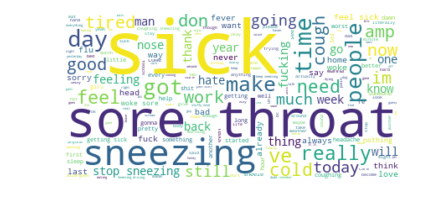

In [28]:
plt.imshow(wordcloud_dict[0], interpolation='bilinear')
plt.axis("off")
plt.show()

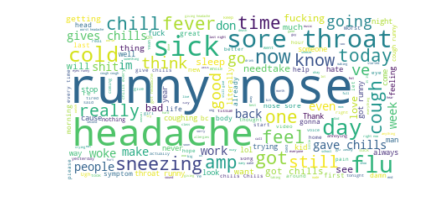

In [29]:
plt.imshow(wordcloud_dict[1], interpolation='bilinear')
plt.axis("off")
plt.show()

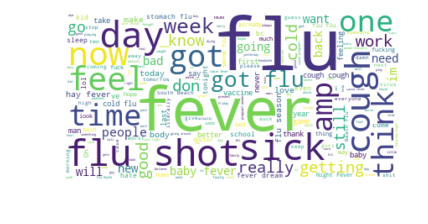

In [30]:
plt.imshow(wordcloud_dict[2], interpolation='bilinear')
plt.axis("off")
plt.show()

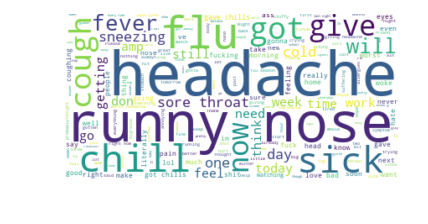

In [31]:
plt.imshow(wordcloud_dict[3], interpolation='bilinear')
plt.axis("off")
plt.show()

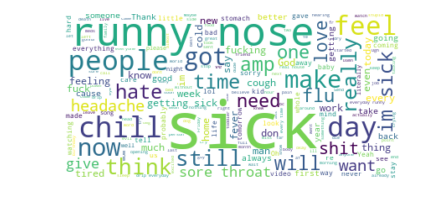

In [32]:
plt.imshow(wordcloud_dict[4], interpolation='bilinear')
plt.axis("off")
plt.show()

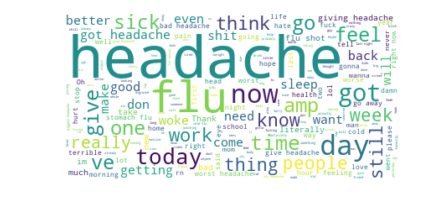

In [33]:
plt.imshow(wordcloud_dict[5], interpolation='bilinear')
plt.axis("off")
plt.show()

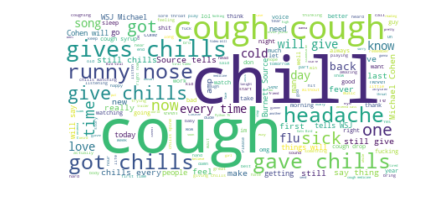

In [34]:
plt.imshow(wordcloud_dict[6], interpolation='bilinear')
plt.axis("off")
plt.show()


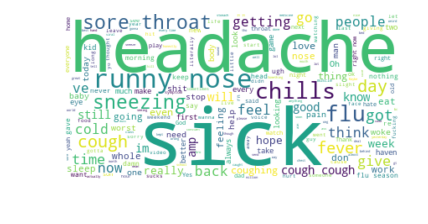

In [35]:
plt.imshow(wordcloud_dict[7], interpolation='bilinear')
plt.axis("off")
plt.show()

**There is some difference between the clusters in terms of sick/not sick. But it's not great. More work is needed.**